## EDA 
(Exploratory Data Analysis)

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import geopandas as gpd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from shapely.geometry import Point

In [8]:
homicidios = pd.read_csv('csv\Homicidios_Final.csv')

In [13]:
homicidios.head()

,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA_SINIESTRO,HORA_SINIESTRO,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,SEMESTRE,Anio,ID
0,Conductor,Moto,Masculino,19,2016-01-01 00:00:00,1,2016-01-01,04:00:00,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.475340,-34.687570,Moto-Auto,Auto,1,2016,1
1,Conductor,Auto,Masculino,70,2016-01-02 00:00:00,1,2016-01-02,01:15:00,Av Gral Paz Y Av De Los Corrales,Gral Paz,9,-58.508775,-34.669777,Auto-Pasajeros,Pasajeros,1,2016,2
2,Conductor,Moto,Masculino,30,2016-01-03 00:00:00,1,2016-01-03,07:00:00,Av Entre Rios 2034,Avenida,1,-58.390403,-34.631894,Moto-Auto,Auto,1,2016,3
3,Conductor,Moto,Masculino,29,2016-02-01 00:00:00,1,2016-01-21,05:20:00,Av San Juan Y Presidente Luis Saenz Peña,Avenida,1,-58.387183,-34.622466,Moto-Pasajeros,Pasajeros,1,2016,4
4,Conductor,Moto,Masculino,30,2016-01-24 00:00:00,1,2016-01-24,18:30:00,Av 27 De Febrero Y Av Escalada,Avenida,8,-58.444513,-34.684759,Moto-Objeto Fijo,Objeto Fijo,1,2016,5


In [10]:
#creamos una columna ID_ para poner en orden los ID desde 1 hasta las filas correspondientes al DF
homicidios['ID_'] = range(1, len(homicidios) + 1)

In [12]:
#elimanos la columna de ID original
homicidios.drop(columns=['ID'], inplace=True)
#cambiamos el nombre de ID_ a ID
homicidios.rename(columns={'ID_': 'ID'}, inplace=True)

In [15]:
victimas = pd.read_csv('Tasa_Homicidios.csv')
victimas.head(2)

,Anio,SEMESTRE,N_VICTIMAS,Poblacion Total,Tasa,Tasa Anterior,Variacion_Tasa
0,2016,1,62,3002178,2.065167,0.000000,0.00
1,2016,2,74,3002178,2.464877,2.065167,19.35


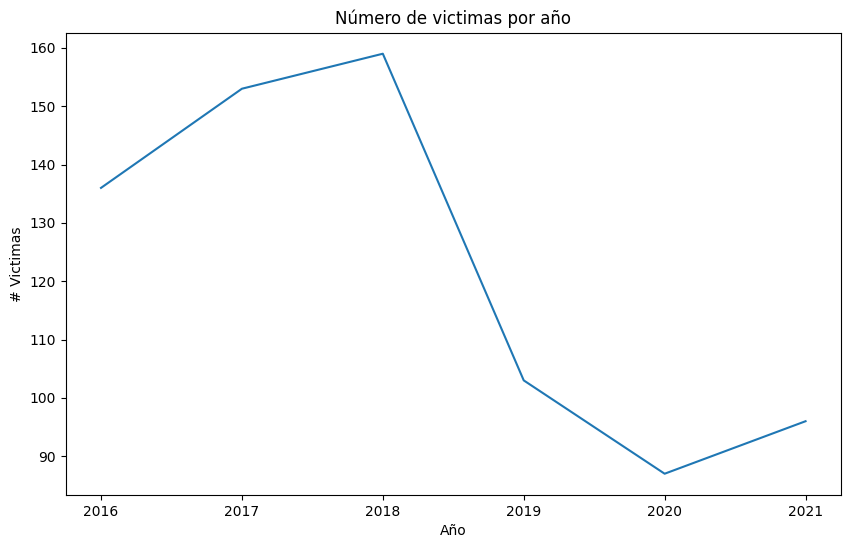

In [17]:
#GRAFICO 1
#agrupamos por año y sumamos la cantidad de victimas
group_victimas= victimas.groupby('Anio')['N_VICTIMAS'].sum()

#Creamos el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(group_victimas.index, group_victimas.values)
plt.xlabel('Año')
plt.ylabel('# Victimas')
plt.title('Número de víctimas por año')
plt.show()

**Conclusiones:**

En el gráfico 1 observamos que en años anteriores a el 2020  las víctimas por accidentes de autos era mayor, esto probablemente por el inicio de la pandemia en 2020, ya que en 2021 volvió a incrementar el numero de victimas, pero en menor cantidad a otros años 

Porcentaje de víctimas por Rol 

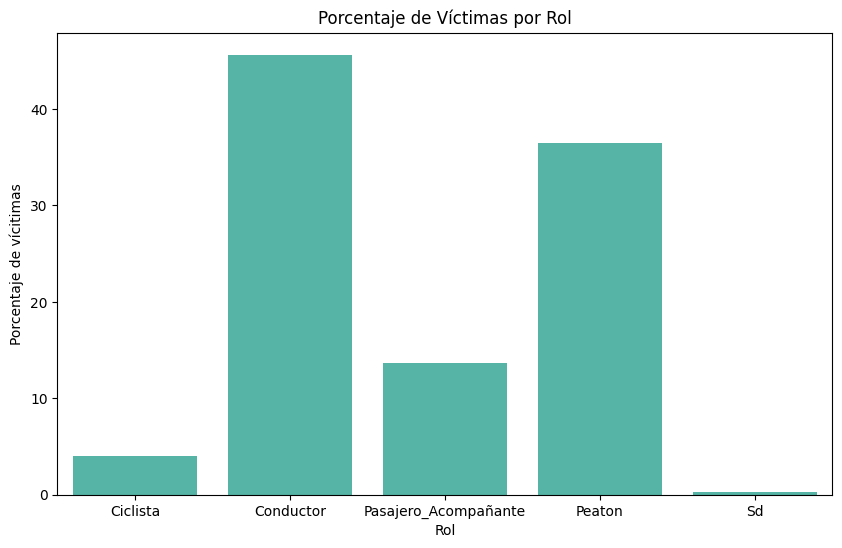

In [22]:
#GRAFICO 2
#agrupamos los datos a utilizar
victimasxrol= homicidios.groupby('ROL')['N_VICTIMAS'].sum()
#calculamos el total de las victimas para poder realizar el porcentaje
victimas_total = homicidios['N_VICTIMAS'].sum()
#calculamos el porcentaje
victimasxrol = (victimasxrol / victimas_total) * 100
#lo convertimos a DF
victimas_DF = victimasxrol.reset_index()
#creamos un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='ROL', y='N_VICTIMAS', data= victimas_DF, color='#45C4B0')
plt.xlabel('Rol')
plt.ylabel('Porcentaje de vícitimas')
plt.title('Porcentaje de Víctimas por Rol')
plt.show()


**Conclusiones del gráfico:**

Cómo se muestra en el gráfico anterior más del 40% de las víctimas corresponde al rol de conductores, en segundo lugar tenemos a los peatones y tercer lugar a los pasajeos acompañantes

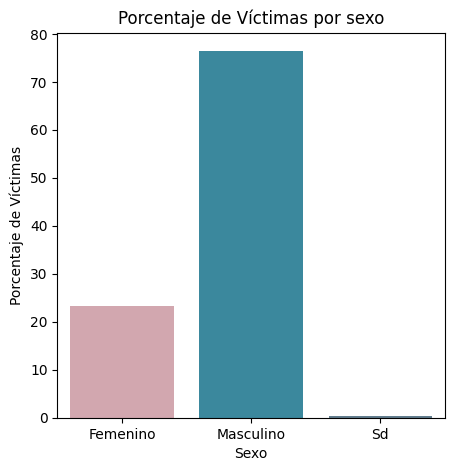

In [36]:
#GRAFICO 3
colors = ['#D9A0AB','#2B91AD', '#5B7F95']
#ahora colcularemos el porcentaje de victimas según su sexo
#agrupamos por sexo y calculamos la suma de las victimas por sexo
group= homicidios.groupby('SEXO')['N_VICTIMAS'].sum()
#calculamos porcentajes
group = group / victimas_total *100
#convertimos la serie a DF
df_group = group.reset_index()
#creamos el gráfico
plt.figure(figsize=(5,5))
sns.barplot(x= 'SEXO', y='N_VICTIMAS', data=df_group,palette=colors)
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de Víctimas')
plt.title('Porcentaje de Víctimas por sexo')
plt.show()

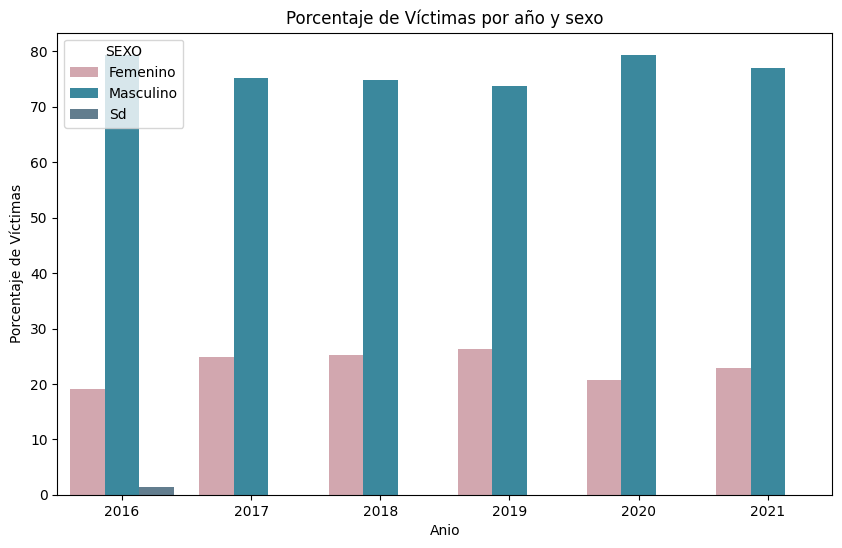

In [47]:
#GRAFICO 4
colors = ['#D9A0AB','#2B91AD', '#5B7F95']
tot_victimas_anio_sexo = homicidios.groupby(['Anio', 'SEXO'])['N_VICTIMAS'].sum().reset_index()
tot_victimas_anio= homicidios.groupby('Anio')['N_VICTIMAS'].sum().reset_index()
tot_victimas_anio_sexo = tot_victimas_anio_sexo.merge(tot_victimas_anio, on='Anio', suffixes=('','_Total'))
tot_victimas_anio_sexo['Porcentaje'] = (tot_victimas_anio_sexo['N_VICTIMAS']/ tot_victimas_anio_sexo['N_VICTIMAS_Total']) *100

#creamos el gráfico
plt.figure(figsize=(10,6))
sns.barplot(x='Anio', y='Porcentaje', hue='SEXO', data=tot_victimas_anio_sexo, palette=colors)
plt.xlabel('Anio')
plt.ylabel('Porcentaje de Víctimas')
plt.title('Porcentaje de Víctimas por año y sexo')
plt.show()

**Conclusiones:**

Cómo podemos observar en el gráfico 3 y 4 las vícitmas de accidentes viales la icidencia es mayor en hombres, siendo hasta 4 veces mayor al de las mujeres. Cómo podemos observar invluso por año este porcentaje es mayor en hombres, siendo los años 2016 y 2020 los que mayor porcentaje de vicitimas masculinas muestran. 

In [48]:
#creamos un rango etario 
num = [0,20,40,60,90]
rango = ['1-20', '21-40', '41-60', '61-90']
homicidios['Rango_etario'] = pd.cut(homicidios['EDAD'], bins=num, labels=rango, right=False)

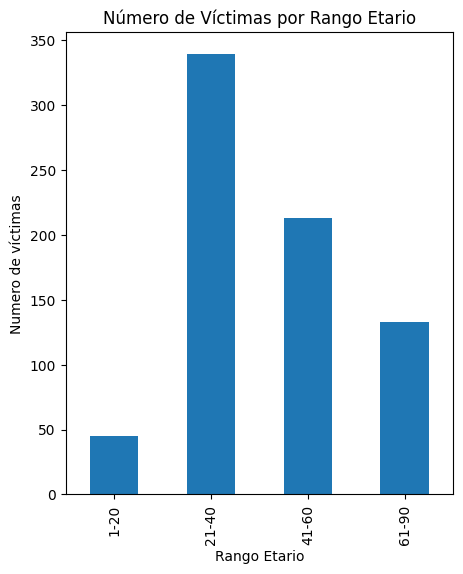

In [51]:
#Gráfico 5
#creamos el gráfico: 'N_VICTIMAS' por 'Rango_etario' 
plt.figure(figsize=(5,6))
homicidios.groupby('Rango_etario')['N_VICTIMAS'].sum().plot(kind='bar')
plt.xlabel('Rango Etario')
plt.ylabel('Numero de víctimas')
plt.title('Número de Víctimas por Rango Etario')
plt.show()

**Conclusiones:**

Observamos que la mayor cantidad de víctimas se encuentran en el rango de edad de 21-40 años 

<Figure size 600x600 with 0 Axes>

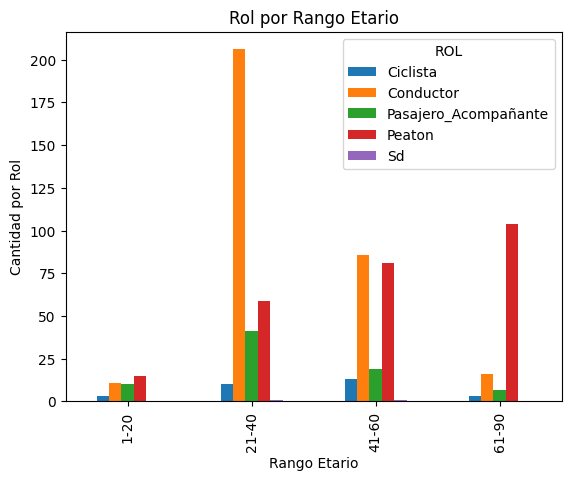

In [54]:
#Gráfico 6
#creamos el gráfico Rol por Rango_etario
plt.figure(figsize=(6,6))
homicidios.groupby(['Rango_etario','ROL']).size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad por Rol')
plt.title('Rol por Rango Etario')
plt.show()

**Conclusiones:**

Cómo podemos ver en el gráfico 6 las víctimas con el rol de conductor se encuentra en su mayoría en el rango de los 21-40 años seguido por los de 41-60 años, mientras que en el rango de 61-90 años el rol de peaton se encuentra con más víctimas


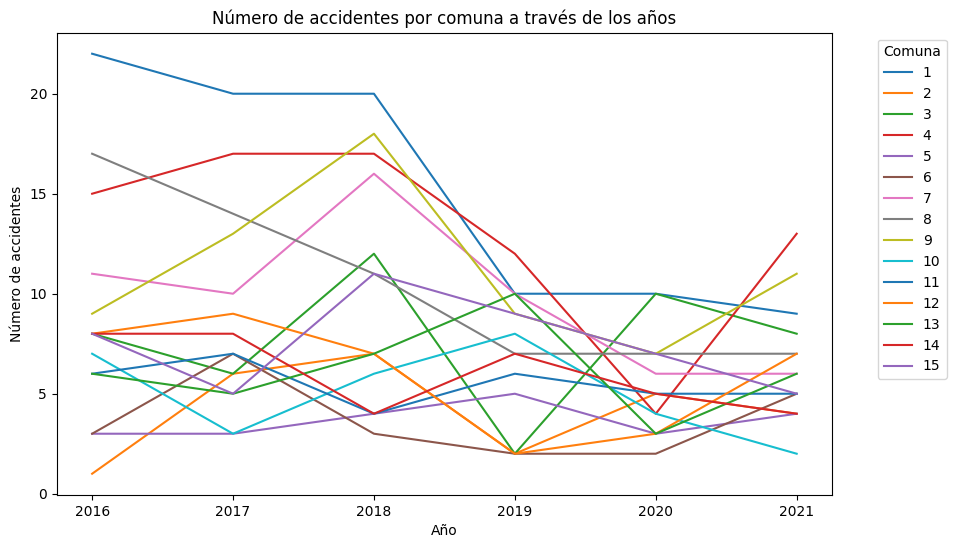

In [56]:
#Gráfico 7 Accidentes por comuna en cada año

#agrupamos por año y comuna y contamos el numeor de accidentes
group = homicidios.groupby(['Anio', 'COMUNA']).size().unstack()

#creamos un gráfico de líneas
plt.figure(figsize=(10,6))
for column in group.columns:
    plt.plot(group.index, group[column], label= column)
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por comuna a través de los años')
plt.legend(title='Comuna', bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()


**Conclusión:**
Cómo observamos en el gráfico 7 hay una notable reduccion de los accidentes en el 2020 a comparación con años anteriores, esto puede deberse a las restricciones debido a la pandemia por COVID-19 en ese año